In [2]:
import pandas as pd
import numpy as np
import datetime

df = pd.read_csv("data/dataset.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


## Partie A : Nettoyage des données

**1. Cleaning variable `availability`**

La variable `availability` contient des chaînes de caractères. 
Transformer ces valeurs en des valeurs de type `datetime` en faisant l'hypothèse que nous sommes le 01/01/2023 (ie pour les occurences 'Immediate Possession' et 'Ready To Move') et que l'année de toutes les dates est 2023. On remplacera les valeurs de la colonne `availability` par ces valeurs.


In [3]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [4]:
def clean_availability(date_string):
    if date_string in ['Immediate Possession', 'Ready To Move']:
        return datetime.datetime(2023, 1, 1)
    else:
        # Séparer et prendre uniquement les deux premiers éléments
        parties = date_string.split('-', 2)[:2]  # Limiter à 2 éléments maximum
        jour, mois_str = parties
        dico_mois = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                     'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
        return datetime.datetime(2023, dico_mois[mois_str], int(jour))

# Appliquer la fonction clean_availability à la colonne 'availability'
df['availability'] = df['availability'].apply(clean_availability)
df['availability']

0       2023-12-19
1       2023-01-01
2       2023-01-01
3       2023-01-01
4       2023-01-01
           ...    
13315   2023-01-01
13316   2023-01-01
13317   2023-01-01
13318   2023-06-18
13319   2023-01-01
Name: availability, Length: 13320, dtype: datetime64[ns]

**2. Cleaning variable `size`**

**ATTENTION ! `df.size` correspond à un attribut de la DataFrame (la taille de la DataFrame) et donc il faudra donc toujours accéder à la variable `size` de ce dataset avec `df['size']`**

La variable `size` contient des chaînes de caractères. Regarder des valeurs et comprendre ce qu'elles veulent dire (on pourra en chercher quelques une sur internet), afin de transformer ces valeurs en des valeurs d'un type numérique (attention il y a des valeurs manquantes). On remplacera les valeurs de la colonne `size` par ces valeurs.

In [5]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [6]:
def clean_size_advanced(size_string):
    if isinstance(size_string, str):
        # Si la valeur n'est pas NaN
        if size_string != 'nan':
            # Si la chaîne contient 'BHK'
            if 'BHK' in size_string:
                # Extraire le chiffre
                num = int(''.join(filter(str.isdigit, size_string)))
                # Ajouter 1 et retourner
                return num + 1
            else:
                # Extraire le nombre associé à la chambre
                num = int(''.join(filter(str.isdigit, size_string)))
                return num
    # Retourner NaN pour les valeurs manquantes ou non-valides
    return np.nan

# Appliquer la fonction clean_size_advanced à la colonne 'size'
df['size'] = df['size'].apply(clean_size_advanced)
df['size']

0        3.0
1        4.0
2        4.0
3        4.0
4        3.0
        ... 
13315    5.0
13316    5.0
13317    3.0
13318    5.0
13319    2.0
Name: size, Length: 13320, dtype: float64

In [7]:
df["size"].unique()

array([ 3.,  4.,  5.,  6.,  2.,  1.,  8.,  7., 12., 10., nan,  9., 28.,
       11., 20., 17., 43., 15., 14., 18.])

**3. Cleaning de la variable `total_sqft`**

La variable `total_sqft` est la surface du bien immobilier mais est encodé en tant que string. Convertir cette valeur en une valeur d'un type numérique. On  remplacera les valeurs de la colonne `total_sqft` par ces valeurs (il n'y a pas besoin de gérer tous les cas, on peut se contenter de 80 / 90 % des lignes qui auront une valeur non nulle renseignée et renvoyer `np.nan` pour les autre 10 / 20 % cas). 


In [8]:
def clean_total_sqft(sqft_str):
  if sqft_str is None:
    return None
  sqft_str = sqft_str.replace(' ', ',')  # Remplacer les espaces par des virgules
  try:
    return float(sqft_str.split()[0])  # Convertir en flottant
  except ValueError:
    return None

df['total_sqft'] = df['total_sqft'].apply(clean_total_sqft)
df['total_sqft']

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13320, dtype: float64

**4. Vérification**


Après toutes ces étapes, la méthode `.info()` appliquée sur la DataFrame `df` doit afficher l'output suivant (où les XXXXX sont des valeurs qui dépendent de vos traitements): 

|   |              |                |                |
|--:|--------------|----------------|----------------|
| 0 | area_type    | 13320 non-null | object         | 
| 1 | availability | 13320 non-null | datetime64[ns] |
| 2 | location     | 13319 non-null | object         |
| 3 | size         | XXXXX non-null | float64        |
| 4 | society      | 7818 non-null  | object         |
| 5 | total_sqft   | XXXXX non-null | float64        |
| 6 | bath         | 13247 non-null | float64        |
| 7 | balcony      | 12711 non-null | float64        |
| 8 | price        | 13320 non-null | float64        |

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   area_type     13320 non-null  object        
 1   availability  13320 non-null  datetime64[ns]
 2   location      13319 non-null  object        
 3   size          13304 non-null  float64       
 4   society       7818 non-null   object        
 5   total_sqft    13073 non-null  float64       
 6   bath          13247 non-null  float64       
 7   balcony       12711 non-null  float64       
 8   price         13320 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 936.7+ KB


**5. Sauvegarde**

Sauvegarder cette dataframe dans un fichier pickle nommée `data_cleaned.pk` (avec les nouvelles valeurs `availability`, `size` et `total_sqft`)

In [10]:
import pickle

with open('data_cleaned.pk', 'wb') as f:
    pickle.dump(df, f)

In [11]:
obj = pd.read_pickle(r'data_cleaned.pk')
obj


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,2023-12-19,Electronic City Phase II,3.0,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,2023-01-01,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,2023-01-01,Uttarahalli,4.0,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,2023-01-01,Lingadheeranahalli,4.0,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,2023-01-01,Kothanur,3.0,NaN,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,2023-01-01,Whitefield,5.0,ArsiaEx,3453.0,4.0,0.0,231.00
13316,Super built-up Area,2023-01-01,Richards Town,5.0,NaN,3600.0,5.0,NaN,400.00
13317,Built-up Area,2023-01-01,Raja Rajeshwari Nagar,3.0,Mahla T,1141.0,2.0,1.0,60.00
13318,Super built-up Area,2023-06-18,Padmanabhanagar,5.0,SollyCl,4689.0,4.0,1.0,488.00


**6. Amélioration cleaning  `total_sqft`**

Veiller à ce que le cleaning de la variable `total_sqft` permette de renseigner plus de `99%` des valeurs.

Sauvegarder cette dataframe dans un fichier pickle nommé `data_cleaned_2.pk`



In [12]:
print((df['total_sqft'].notna().sum() / len(df)) * 100)
with open("data_cleaned_2.pk", "wb") as f:
    pickle.dump(df, f)


98.14564564564564


### Partie B : Statistiques descriptives
***

**Réutiliser les données de `data_cleaned` ou de `data_cleaned_2` pour cette partie**


**1.Scatter plots**

Pour chaque variable quantitative autre que le prix, la représenter dans un scatter plot en abscisse, avec en ordonnée le prix.

In [13]:
df = pd.read_pickle("data_cleaned_2.pk")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,2023-12-19,Electronic City Phase II,3.0,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,2023-01-01,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,2023-01-01,Uttarahalli,4.0,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,2023-01-01,Lingadheeranahalli,4.0,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,2023-01-01,Kothanur,3.0,NaN,1200.0,2.0,1.0,51.00


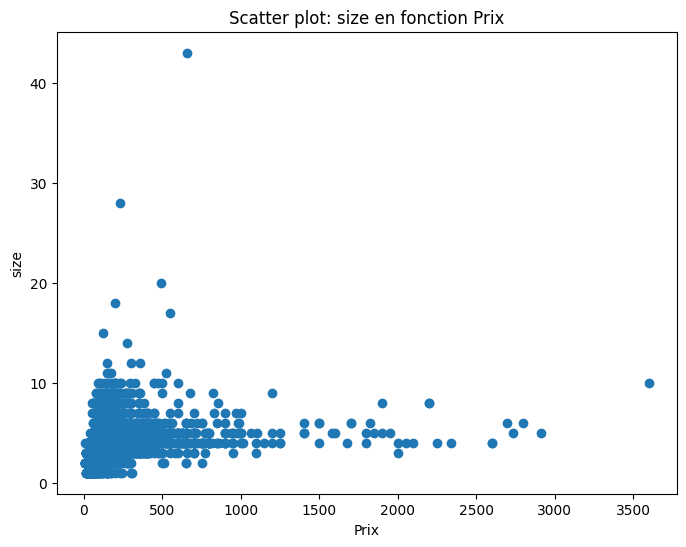

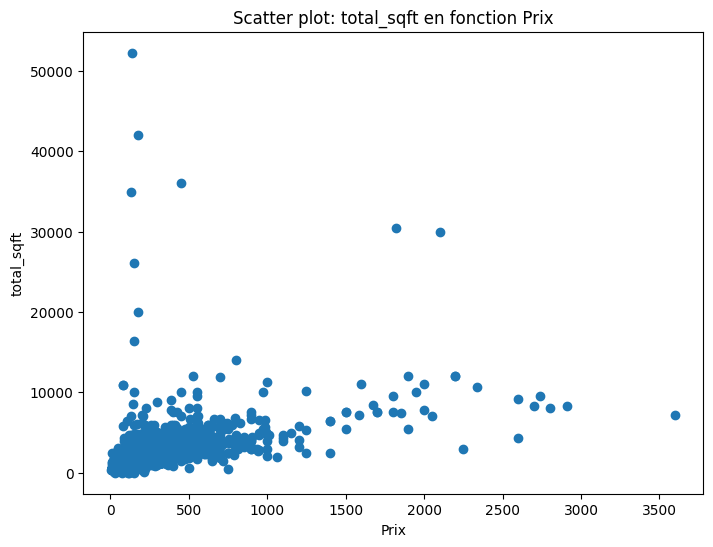

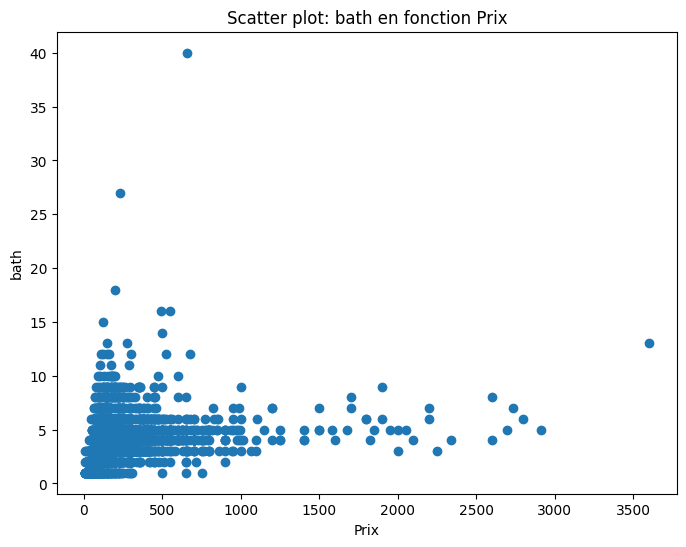

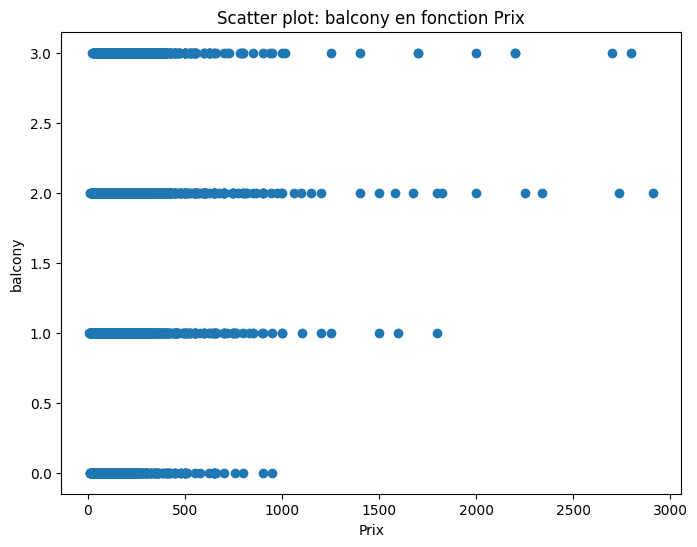

In [14]:
import matplotlib.pyplot as plt


# Obtenir les noms des variables quantitatives (sauf le prix)
quantitative_variables = [col for col in df.columns if df[col].dtype == 'float64' and col != 'price']

# Créer un scatter plot pour chaque variable quantitative
for var in quantitative_variables:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['price'], df[var])
    plt.xlabel('Prix')
    plt.ylabel(var)
    plt.title(f'Scatter plot: {var} en fonction Prix')
    plt.show()

**2.**

Représenter un graphique qui permet de déterminer pour quel nombre de balcons les biens ont le prix moyen le plus élevé.

Nombre de balcons pour le prix moyen le plus élevé : 3.0


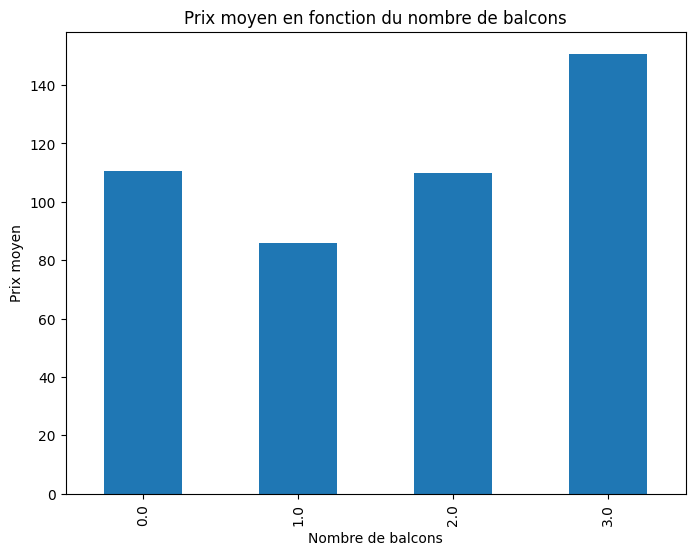

In [15]:
grouped_by_balconies = df.groupby('balcony')['price'].mean()

n_balconies_max_price = grouped_by_balconies.idxmax()

print(f"Nombre de balcons pour le prix moyen le plus élevé : {n_balconies_max_price}")

# Graphique
plt.figure(figsize=(8, 6))
grouped_by_balconies.plot(kind='bar')
plt.xlabel('Nombre de balcons')
plt.ylabel('Prix moyen')
plt.title('Prix moyen en fonction du nombre de balcons')
plt.show()

**3.**

Faire de même avec les salles de bains à la place des balcons.

Nombre de salles de bains pour le prix moyen le plus élevé : 13.0


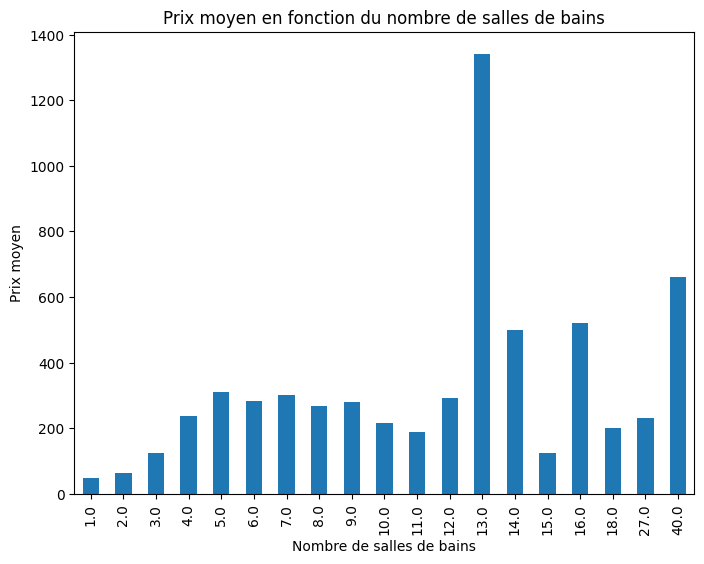

In [16]:
grouped_by_bathrooms = df.groupby('bath')['price'].mean()

n_bathrooms_max_price = grouped_by_bathrooms.idxmax()

print(f"Nombre de salles de bains pour le prix moyen le plus élevé : {n_bathrooms_max_price}")

# Graphique
plt.figure(figsize=(8, 6))
grouped_by_bathrooms.plot(kind='bar')
plt.xlabel('Nombre de salles de bains')
plt.ylabel('Prix moyen')
plt.title('Prix moyen en fonction du nombre de salles de bains')
plt.show()


**4.**

Créer une DataFrame qui contient les colonnes suivantes : 
- `availability` : les dates de disponibilité possibles (valeurs uniques)
- `count` : le nombre de biens qui deviennent disponibles à cette date
- `count_cum`: le nombre de biens cumulés disponibles à cette date
- `price_mean`: le prix moyen des biens qui deviennent disponibles à cette date

Stocker cette DataFrame dans un fichier pickle nommé `data_availability.pk`.

In [17]:
availability_dates = df['availability'].unique()

availability_df = pd.DataFrame({
    'availability': availability_dates,
    'count': 0,
    'count_cum': 0,
    'price_mean': 0
})

# Remplir le DataFrame avec les informations calculées
for date in availability_dates:
    availability_df.loc[availability_df['availability'] == date, 'count'] += 1
    availability_df.loc[availability_df['availability'] == date, 'count_cum'] = availability_df['count'].sum()
    availability_df.loc[availability_df['availability'] == date, 'price_mean'] = df[df['availability'] == date]['price'].mean()

availability_df


C:\Users\Othytou\AppData\Local\Temp\ipykernel_8612\283156413.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '111.37935135135135' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  availability_df.loc[availability_df['availability'] == date, 'price_mean'] = df[df['availability'] == date]['price'].mean()


,availability,count,count_cum,price_mean
0,2023-12-19,1,1,111.379351
1,2023-01-01,1,2,115.154591
2,2023-05-18,1,3,99.380610
3,2023-02-18,1,4,126.775000
4,2023-11-18,1,5,61.646915
...,...,...,...,...
75,2023-01-17,1,76,139.000000
76,2023-11-16,1,77,39.000000
77,2023-04-20,1,78,264.737500
78,2023-01-16,1,79,110.000000


In [18]:
#  Enregistrer le DataFrame dans un fichier pickle
with open("data_availability.pk", "wb") as f:
    pickle.dump(availability_df, f)

**5.**

Représenter la matrice des corrélations des variables quantitatives
Vous pouvez vous inspirer de la réponse de Yunununun
sur ce thread : https://stackoverflow.com/questions/39409866/correlation-heatmap

Stocker les informations de la matrice des corrélations dans un fichier pickle nommé `correlation_matrix_values.pk` qui contient les colonnes suivant : `variable_1`,  `variable_2`, `coefficient_correlation`.

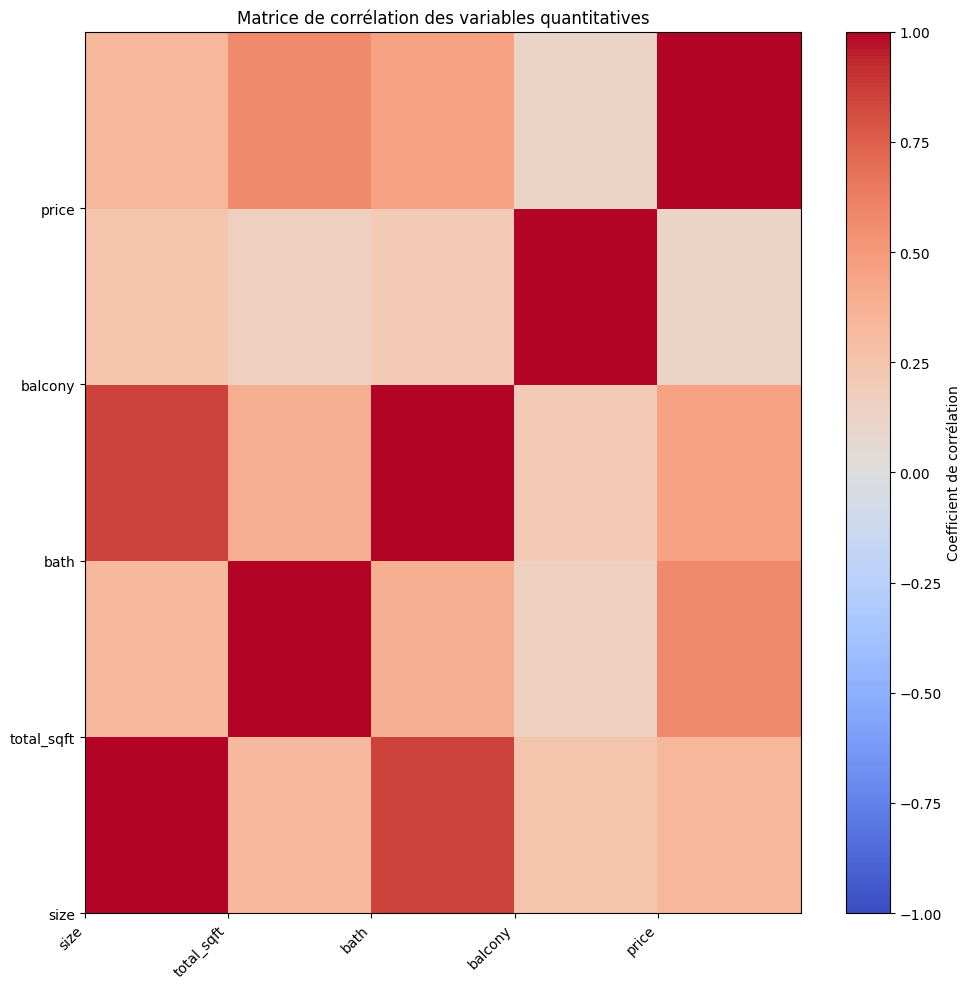

In [19]:
quantitative_variables = [col for col in df.columns if df[col].dtype == 'float64']

correlation_matrix = df[quantitative_variables].corr()

# Créer un heatmap pour la matrice de corrélation
plt.figure(figsize=(10, 10))
plt.pcolor(correlation_matrix, vmin=-1, vmax=1, cmap='coolwarm')
plt.colorbar(label='Coefficient de corrélation')
plt.xticks(range(len(quantitative_variables)), quantitative_variables, rotation=45, ha='right')
plt.yticks(range(len(quantitative_variables)), quantitative_variables)
plt.title('Matrice de corrélation des variables quantitatives')
plt.tight_layout()
plt.show()

In [20]:
# Transformer la matrice de corrélation en un DataFrame
correlation_df = correlation_matrix.stack().reset_index().rename(
    columns={'level_0': 'variable_1', 'level_1': 'variable_2', 0: 'coefficient_correlation'}
)
print(correlation_df)

with open("correlation_matrix_values.pk", "wb") as f:
    pickle.dump(correlation_df, f)

    variable_1  variable_2  coefficient_correlation
0         size        size                 1.000000
1         size  total_sqft                 0.328019
2         size        bath                 0.853630
3         size     balcony                 0.257238
4         size       price                 0.341731
5   total_sqft        size                 0.328019
6   total_sqft  total_sqft                 1.000000
7   total_sqft        bath                 0.387206
8   total_sqft     balcony                 0.155187
9   total_sqft       price                 0.572904
10        bath        size                 0.853630
11        bath  total_sqft                 0.387206
12        bath        bath                 1.000000
13        bath     balcony                 0.204201
14        bath       price                 0.456345
15     balcony        size                 0.257238
16     balcony  total_sqft                 0.155187
17     balcony        bath                 0.204201
18     balco

### Partie C : prédiction
***

**Le notebook `example.ipynb` contient du code qui est susceptible de vous aider.**

**Réutiliser les données de `data_cleaned` ou de `data_cleaned_2` pour cette partie**



In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_pickle("data_cleaned_2.pk")


#### **0. Données : découpage du dataset en train et test**

En fonction du nettoyage, il y a plus ou moins de valeurs nulles. 

**Retirer toutes les lignes qui ont au moins une valeur nulle dans une colonne numérique. Stocker ces données dans un fichier pickle nommé  `data_cleaned_3.pk`.**

En utilisant la méthode `train_test_split` de `sklearn.model_selection` sur les données sans les valeurs manquantes, créer une DataFrame `df_train` contenant 70 % des données et une DataFrame `df_test` contenant 30 % des données. Renseigner l'argument `random_state` et lui donner une valeur de 42.

**Stocker ces données dans deux fichiers pickle nommée `train.pk` et `test.pk`.**


In [22]:
df_cleaned = df.dropna(subset=[col for col in df.columns if df[col].dtype == 'float64'])

# Enregistrer le DataFrame nettoyé
with open("data_cleaned_3.pk", "wb") as f:
    pickle.dump(df_cleaned, f)

In [23]:

# Diviser le DataFrame en ensembles de train et de test
X = df_cleaned.drop('price', axis=1)
y = df_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
print(X, y)

                  area_type availability                  location  size  \
0      Super built-up  Area   2023-12-19  Electronic City Phase II   3.0   
1                Plot  Area   2023-01-01          Chikka Tirupathi   4.0   
2            Built-up  Area   2023-01-01               Uttarahalli   4.0   
3      Super built-up  Area   2023-01-01        Lingadheeranahalli   4.0   
4      Super built-up  Area   2023-01-01                  Kothanur   3.0   
...                     ...          ...                       ...   ...   
13314  Super built-up  Area   2023-01-01         Green Glen Layout   4.0   
13315        Built-up  Area   2023-01-01                Whitefield   5.0   
13317        Built-up  Area   2023-01-01     Raja Rajeshwari Nagar   3.0   
13318  Super built-up  Area   2023-06-18           Padmanabhanagar   5.0   
13319  Super built-up  Area   2023-01-01              Doddathoguru   2.0   

       society  total_sqft  bath  balcony  
0      Coomee       1056.0   2.0      1.0  

In [25]:
print(X_train)

                  area_type availability                     location  size  \
173    Super built-up  Area   2023-01-01              Electronic City   4.0   
8897   Super built-up  Area   2023-04-18              Electronic City   3.0   
138    Super built-up  Area   2023-05-18  Bommasandra Industrial Area   4.0   
13073            Plot  Area   2023-01-01                   Nagarbhavi   4.0   
6918             Plot  Area   2023-01-01         2nd Stage Nagarbhavi   4.0   
...                     ...          ...                          ...   ...   
12719  Super built-up  Area   2023-08-18                   Chandapura   3.0   
5536             Plot  Area   2023-01-01          Devarachikkanahalli   3.0   
5753   Super built-up  Area   2023-01-01                Richmond Town   3.0   
917          Built-up  Area   2023-01-01                 Marathahalli   3.0   
7765   Super built-up  Area   2023-01-01                       Hebbal   3.0   

       society  total_sqft  bath  balcony  
173    

In [26]:
# Enregistrer les ensembles de train et de test
with open("train.pk", "wb") as f:
    pickle.dump((X_train, y_train), f)

with open("test.pk", "wb") as f:
    pickle.dump((X_test, y_test), f)




#### **1. Prédiction avec une variable numérique**

**a. Un premier modèle**

On veut entraîner un modèle de régression linéaire de la forme $Y = a \times X$ où $Y$ est le prix et $X$ la surface. Cela reviendrait à dire que le prix est uniquement dépendant de la surface $X$ et du coefficient $a$ (qui serait le prix au mètre carré) ce qui est bien sûr une approximation (mais une approximation intéressante).

Entraîner un modèle de régression linéaire avec pour $X$ la variable `total_sqft` et pour $Y$  la variable `price` en utilisant `sklearn` sur la DataFrame `df_train` (l'argument `fit_intercept` peut valoir `True` ou `False` à votre convenance).

Calculer les prédictions `y_pred_test` sur la DataFrame de `test`. Stocker ces prédictions dans une table `model_1_predictions` qui contient les colonnes : 
- `index` (l'index de la DataFrame originelle)
- `total_sqft` (la valeur de `total_sqft`)
- `price` : la vraie valeur du prix 
- `price_pred` :  la valeur de la prédiction.


In [27]:
# Entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train[['total_sqft']], y_train)

# Obtenir les prédictions sur le jeu de test
y_pred_test = model.predict(X_test[['total_sqft']])

# Créer une table avec les prédictions
model_1_predictions = pd.DataFrame({
    'index': X_test.index,
    'total_sqft': X_test['total_sqft'],
    'price': y_test,
    'price_pred': y_pred_test
})
model_1_predictions

,index,total_sqft,price,price_pred
12395,12395,1680.0,92.00,115.868087
8102,8102,1362.0,62.63,96.091624
12645,12645,1200.0,66.00,86.016823
9849,9849,1450.0,88.60,101.564356
11789,11789,1602.0,56.00,111.017256
...,...,...,...,...
541,541,1768.0,101.00,121.340819
3097,3097,1200.0,195.00,86.016823
2023,2023,1490.0,98.00,104.051961
3707,3707,2170.0,151.00,146.341252


In [28]:
# Stocker la table des prédictions
with open("model_1_predictions.pk", "wb") as f:
    pickle.dump(model_1_predictions, f)

**b. Un second modèle**

Crée une variable qui est égale au nombre de jours à attendre avant que le bien soit disponible. On nomme cette variable `days_before`.
Faire de même qu'en a. avec la variable `days_before` pour $X$ (à la place de `total_sqft`).

In [29]:
# Date choisie pour avoir des résultats logiques 
date_actual = '2023-01-01'


X_train['days_before'] = (X_train['availability'] - pd.to_datetime(date_actual)).dt.days
X_test['days_before'] = (X_test['availability'] - pd.to_datetime(date_actual)).dt.days

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train[['days_before']], y_train)

# Obtenir les prédictions sur le jeu de test
y_pred_test = model.predict(X_test[['days_before']])

# Créer une table avec les prédictions
model_with_day_before_predictions = pd.DataFrame({
    'index': X_test.index,
    'price': y_test,
    'price_pred': y_pred_test,
    'days_before': X_test.days_before
})

model_with_day_before_predictions

,index,price,price_pred,days_before
12395,12395,92.00,107.939672,0
8102,8102,62.63,107.939672,0
12645,12645,66.00,107.939672,0
9849,9849,88.60,89.859563,261
11789,11789,56.00,104.614595,48
...,...,...,...,...
541,541,101.00,83.486498,353
3097,3097,195.00,107.939672,0
2023,2023,98.00,107.939672,0
3707,3707,151.00,98.449347,137


#### **2. Prédiction avec plusieurs variables numériques**

On veut entraîner un modèle de régression linéaire de la forme $ Y = a_1 \times X_1 + a_2 \times X_2 + ....$ où $Y$ est le prix et $X_1$, $X_2$ ... sont des variables quantitatives parmi la surface, le nombre de pièces, le nombre de balcons, le nombre de salle de bains et le nombre de jours). 

Entraîner un modèle de régression linéaire avec toutes les variables numériques autres que le prix pour $X$ et pour $Y$  la variable `price` en utilisant `sklearn` sur la DataFrame `df_train` (l'argument `fit_intercept` peut valoir `True` ou `False` à votre convenance).

Calculer les prédictions `y_pred_test` sur la DataFrame de `test`. Stocker ces prédictions dans une table `model_2_predictions` qui contient les colonnes : 
- `index` (l'index de la DataFrame originelle)
- `total_sqft` (la valeur de `total_sqft`)
- `price` : la vraie valeur du prix 
- `price_pred` :  la valeur de la prédiction.

In [30]:
# Création et entraînement du modèle
model = LinearRegression()
model.fit(X_train[['total_sqft', 'size', 'bath', 'balcony', 'days_before']], y_train)

# Prédictions sur le jeu de données de test
y_pred_test = model.predict(X_test[['total_sqft', 'size', 'bath', 'balcony', 'days_before']])

# Création de la table des prédictions
model_2_predictions = pd.DataFrame({
    "index": X_test.index,
    "total_sqft": X_test["total_sqft"],
    "price": y_test,
    "price_pred": y_pred_test
})

model_2_predictions

,index,total_sqft,price,price_pred
12395,12395,1680.0,92.00,82.755687
8102,8102,1362.0,62.63,109.692264
12645,12645,1200.0,66.00,70.131292
9849,9849,1450.0,88.60,106.640308
11789,11789,1602.0,56.00,120.460632
...,...,...,...,...
541,541,1768.0,101.00,121.819432
3097,3097,1200.0,195.00,171.251819
2023,2023,1490.0,98.00,71.832088
3707,3707,2170.0,151.00,146.496901


In [31]:
# Stocker la table des prédictions
with open("model_2_predictions.pk", "wb") as f:
    pickle.dump(model_2_predictions, f)

#### **3. Prédiction avec plusieurs variables numériques et une catégorie**

Inclure une variable catégorielle dans le modèle de régression linéaire en utilisant `pandas.get_dummies`. Vous pourrez vous inspirer de : https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/10_multiple_regression.html

In [39]:
from sklearn.preprocessing import OneHotEncoder

# Sélectionner les variables numériques pour X
X_num_train = X_train[['total_sqft', 'size', 'bath', 'balcony', 'days_before']]
X_num_test = X_test[['total_sqft', 'size', 'bath', 'balcony', 'days_before']]

# Encoder la variable catégorielle "location"
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_location = encoder.fit_transform(X_train[['location']])
X_test_location = encoder.transform(X_test[['location']])

X_multiple_linear = np.hstack((X_num_train, X_train_location.toarray()))

# Entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_multiple_linear, y_train)

# Obtenir les prédictions sur le jeu de test
X_test_encoded = np.hstack((X_num_test, X_test_location.toarray()))
y_pred_test = model.predict(X_test_encoded)

# Créer une table avec les prédictions
model_3_predictions = pd.DataFrame({
    'index': X_test.index,
    'total_sqft': X_test['total_sqft'],
    'price': y_test,
    'price_pred': y_pred_test
})

model_3_predictions


,index,total_sqft,price,price_pred
12395,12395,1680.0,92.00,77.382082
8102,8102,1362.0,62.63,84.613525
12645,12645,1200.0,66.00,51.767686
9849,9849,1450.0,88.60,105.319971
11789,11789,1602.0,56.00,113.218015
...,...,...,...,...
541,541,1768.0,101.00,123.068914
3097,3097,1200.0,195.00,153.744174
2023,2023,1490.0,98.00,60.649130
3707,3707,2170.0,151.00,130.952070


In [33]:
# Stocker la table des prédictions
with open("model_3_predictions.pk", "wb") as f:
    pickle.dump(model_3_predictions, f)

#### **4. Prédiction avec un autre type de modèle**
Utiliser un autre modèle (par exemple un RandomForest ou un SVM ou autre) pour prédire le prix.
Comparer sur le test la qualité des prédictions des différents modèles : on pourra utiliser un $R^2$ ou toute autre métrique adéquate.

In [34]:
X_train

,area_type,availability,location,size,society,total_sqft,bath,balcony,days_before
173,Super built-up Area,2023-01-01,Electronic City,4.0,GMown E,1350.0,2.0,1.0,0
8897,Super built-up Area,2023-04-18,Electronic City,3.0,Prarkun,1355.0,2.0,1.0,107
138,Super built-up Area,2023-05-18,Bommasandra Industrial Area,4.0,NaN,1280.0,3.0,1.0,137
13073,Plot Area,2023-01-01,Nagarbhavi,4.0,NaN,600.0,3.0,2.0,0
6918,Plot Area,2023-01-01,2nd Stage Nagarbhavi,4.0,NaN,600.0,4.0,2.0,0
...,...,...,...,...,...,...,...,...,...
12719,Super built-up Area,2023-08-18,Chandapura,3.0,SunceEs,985.0,2.0,1.0,229
5536,Plot Area,2023-01-01,Devarachikkanahalli,3.0,NaN,1200.0,3.0,1.0,0
5753,Super built-up Area,2023-01-01,Richmond Town,3.0,APusenc,1233.0,2.0,3.0,0
917,Built-up Area,2023-01-01,Marathahalli,3.0,Foodasa,1170.0,2.0,3.0,0


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Entraîner un modèle Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_num_train, y_train)
rf_y_pred_test = rf_model.predict(X_num_test)

# Entraîner un modèle SVM
svr_model = SVR()
svr_model.fit(X_num_train, y_train)
svr_y_pred_test = svr_model.predict(X_num_test)

# Créer une table avec les prédictions des différents modèles
model_4_predictions = pd.DataFrame({
    'index': X_test.index,
    'total_sqft': X_test['total_sqft'],
    'price': y_test,
    'price_pred_linear': y_pred_test,
    'price_pred_rf': rf_y_pred_test,
    'price_pred_svr': svr_y_pred_test
})

model_4_predictions



,index,total_sqft,price,price_pred_linear,price_pred_rf,price_pred_svr
12395,12395,1680.0,92.00,77.382082,90.748967,100.257691
8102,8102,1362.0,62.63,84.613525,60.446609,70.991891
12645,12645,1200.0,66.00,51.767686,68.924973,59.028115
9849,9849,1450.0,88.60,105.319971,66.246933,76.490750
11789,11789,1602.0,56.00,113.218015,90.994895,91.884342
...,...,...,...,...,...,...
541,541,1768.0,101.00,123.068914,94.739848,107.195563
3097,3097,1200.0,195.00,153.744174,168.646071,59.032305
2023,2023,1490.0,98.00,60.649130,185.429810,81.969069
3707,3707,2170.0,151.00,130.952070,221.624289,151.822961


In [43]:
# Stocker la table des prédictions
with open("model_4_predictions.pk", "wb") as f:
    pickle.dump(model_4_predictions, f)

In [42]:
# Comparer les modèles en utilisant R2

r2_linear = r2_score(y_test, y_pred_test)
print(r2_linear,)

-20146829247914.938
